In [1]:
#
# Import Libraries
#

from dotmap import DotMap
import numpy as np
import os
import pandas as pd
import sys

#from sklearn.decomposition import FactorAnalysis
#from factor_analyzer import FactorAnalyzer

from mofapy2.run.entry_point import entry_point
import mofax as mfx

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
#rcParams['figure.dpi'] = 200

from plotly import graph_objects as go
from plotly.subplots import make_subplots

utilsPath = r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils'
if utilsPath not in sys.path:
    sys.path.append(utilsPath)

In [2]:
#
# Set constants
#

Qworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Proteomics\ALDH4"
Mworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metabolomics\ALDH4"

# X
xq_path = os.path.join(Qworking_path, "WorkingFiles", "Xq_minus_X_norm.tsv")
mq_path = os.path.join(Mworking_path, "WorkingFiles", "Xm_norm.tsv")

# Feature info
m2i_path = os.path.join(Mworking_path, "WorkingFiles", "f2i_TP.tsv")
q2i_path = os.path.join(Qworking_path, "WorkingFiles", "q2info.tsv")

# metadata
mdata_path = os.path.join(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metadata\ALDH4\WorkingFiles\main_metadata.tsv")

# RPath
rPath = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\ALDH4\myRData"


qualCols = ['Group', 'Ig', 'Control']
quanCols = []

In [3]:
#
# Read data
#

xq = pd.read_csv(xq_path, sep='\t', index_col=0)
xm = pd.read_csv(mq_path, sep='\t', index_col=0)

q2i = pd.read_csv(q2i_path, sep='\t')
m2i = pd.read_csv(m2i_path, sep='\t')

mdata = pd.read_csv(mdata_path, sep='\t', index_col='Seqn')

In [4]:
# Intersect q-omics and m-omics

seqn = np.intersect1d(
    xq.index,
    xm.index
)

xqi = xq.loc[seqn].copy()
xmi = xm.loc[seqn].copy()
mdatai = mdata.loc[seqn]

In [5]:
xqi

,A0A068ETZ5,A0A075B5M7,A0A075B5N7,A0A077S2U6,A0A087WQ04,A0A087WSN6,A0A0A6YX73,A0A0A6YXX3,A0A0B4J1G0,A0A0F7R1P3,...,Q9Z2W0,Q9Z2W1,Q9Z2X1,Q9Z2Z6,Q9Z2Z9,Q9Z315,Q9Z329,V9GX23,V9GX81,V9GZG9
LD2157,1.470709,0.728268,0.239434,0.629860,0.346684,-0.768529,-0.151607,-0.720587,-1.131500,0.624086,...,0.433994,-0.328983,-0.448418,1.087102,-0.586421,0.337174,0.628212,-0.411281,0.538590,-0.539430
LD2158,0.293749,1.428234,-0.958220,-0.283101,-0.792700,-0.642489,-0.408326,-0.507594,-0.111043,1.191472,...,-0.140091,-0.450955,-0.278246,1.133419,-0.291039,0.124204,-1.436290,-0.084355,-0.784256,-1.923728
LD2162,-0.000302,0.475588,0.462267,1.448222,1.540372,0.455561,0.498914,0.188197,0.287110,0.646037,...,-0.290176,-0.007101,0.816649,-0.808988,0.222696,0.295230,0.531553,0.536661,-0.073693,0.072794
LD2163,-1.424368,-0.894406,-0.492341,-0.311449,-0.974578,0.064623,1.187151,0.521919,0.413692,-0.268196,...,-0.646254,-0.369980,-0.034390,-0.062061,-0.274352,0.306093,0.152952,1.147707,-1.361432,-0.495173
LD2164,-0.092239,-0.557316,0.109463,1.539503,1.556236,0.286128,-0.113698,-0.390569,1.540736,-1.322273,...,-0.650026,0.068874,0.348692,-0.322617,0.512429,2.115669,0.159858,0.099209,0.102806,1.119258
LD2166,0.564358,0.221899,-0.435412,0.474162,-0.335013,-0.429967,0.037070,1.263044,0.464298,-1.786908,...,0.278461,-1.087575,1.230204,-0.349483,-0.154196,-0.143961,0.640699,-0.317595,-0.005795,-1.327997
LD2169,1.279097,0.010173,-0.737018,0.524464,0.341561,0.315380,1.097168,0.589914,-0.172599,0.824365,...,0.193639,-1.345532,0.017766,-0.286392,0.645910,-0.168119,-0.387448,0.764313,0.899096,1.011077
LD2170,0.419221,-1.622095,-0.802651,-0.577019,0.261634,-1.219363,0.112897,0.544901,1.162807,-1.396020,...,1.391225,-0.685796,-2.640269,-0.063342,0.866284,0.520256,0.537130,1.301659,1.215059,0.915081
LD2171,-0.683920,-0.573315,2.802406,-1.296037,-1.875424,2.595122,-0.377418,-0.681708,-1.515444,-0.165865,...,-1.128987,1.179577,0.009628,1.587224,-1.928190,-2.025812,-0.165608,-1.878271,-0.703815,1.281334
LD2214,-0.137111,0.023750,-0.783415,0.431371,0.244911,0.531689,0.548495,0.121478,0.771992,1.298153,...,-1.737981,1.376712,0.978924,0.459566,-1.260063,-1.005700,-0.377675,-1.729825,0.721030,0.469123


In [6]:
#
# Run MOFA
#

# Create data matrix object (without separating by groups)

data_mat = [
    [
    xqi.to_numpy(),
    ],
    [
    xmi.to_numpy(),
    ]
]

# g = ['A12', 'B1-8', 'PBS']
# data_mat = [
#     [xqi.loc[g2s[i],:].to_numpy() for i in g],
#     [xmi.loc[g2s[i],:].to_numpy() for i in g]
# ]

ent = entry_point()
ent.set_data_options(scale_groups=False, scale_views=False, center_groups=False)

ent.set_data_matrix(
    data_mat, 
    views_names=['q', 'm'], 
    features_names=[xqi.columns, xmi.columns],
    samples_names=[[str(i) for i in seqn]],
    # samples_names=[g2s[i] for i in g],
    likelihoods=['gaussian', 'gaussian'],
    # groups_names=g
)

ent.set_model_options(
    factors = min(xq.join(xm, how='inner').shape[0], xq.shape[1]+xm.shape[1]), 
    spikeslab_weights = True, 
    spikeslab_factors=False,
    ard_factors=False,
    ard_weights = True,
)

ent.set_train_options(
    convergence_mode = "slow", 
    iter=10000,
    dropR2 = 0.015, 
    gpu_mode = False, 
    seed = 1,
)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Successfully loaded view='q' group='group0' with N=16 samples and D=4118 features...
Successfully loaded view='m' group='group0' with N=16 samples and D=2935 features...


Model options:
- Automatic Relevance Determination prior on the factors: False
- Automatic Relevance Determination pri

In [7]:
ent.build()

ent.run()

# Save the output
ent.save(outfile=r'./modelpy_recover.hdf5')



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -1563393.88 

Iteration 1: time=0.09, ELBO=-281623.15, deltaELBO=1281770.729 (81.98642373%), Factors=15
Iteration 2: time=0.08, ELBO=-234295.53, deltaELBO=47327.615 (3.02723553%), Factors=14
Iteration 3: time=0.08, ELBO=-219312.05, deltaELBO=14983.488 (0.95839496%), Factors=13
Iteration 4: time=0.07, ELBO=-212765.77, deltaELBO=6546.272 (0.41872185%), Factors=12
Iteration 5: time=0.07, ELBO=-208548.82, deltaELBO=4216.954 (0.26973072%), Factors=11
Iteration 6: time=0.06, ELBO=-205228.38, deltaELBO=3320.439 (0.21238661%), Factors=10
Iteration 7: time=0.06, ELBO=-202317.61, deltaELBO=2910.767 (0.18618257%), Factors=9
Iteration 8: time=0.05, ELBO=-199623.60, deltaELBO=2694.009 (0.17231801%), Factors=8
Iteration 9: time=0.04, ELBO=-199336.77, deltaELBO=286.836 (0.01834699%), Factors=8
Iteration 10: time=0.05, ELBO=-199110.34, deltaELBO=226.433 (0.014483

In [8]:
m = mfx.mofa_model('modelpy_recover.hdf5')

In [9]:
m

MOFA+ model: modelpy recover
Samples (cells): 16
Features: 7053
Groups: group0 (16)
Views: m (2935), q (4118)
Factors: 8
Expectations: W, Z

In [10]:
print(f"""\
Observations: {m.shape[0]}
Features: {m.shape[1]}
Groups of observations: {', '.join(m.groups)}
Views: {', '.join(m.views)}
""")

Observations: 16
Features: 7053
Groups of observations: group0
Views: q, m



In [11]:
# Get weights from the model

wq = m.get_weights(df=True).loc[xqi.columns]
wm = m.get_weights(df=True).loc[xmi.columns]

In [12]:
dict(list(m.get_variance_explained().set_index('Factor').rename(columns={'R2': 'Explained_Variance'}).groupby('View')))['m']\
    .drop(['View', 'Group'], axis=1).T.to_dict()
# m.get_variance_explained()

{'Factor1': {'Explained_Variance': 11.272476137870735},
 'Factor2': {'Explained_Variance': 0.15771584398279748},
 'Factor3': {'Explained_Variance': 13.440704885813314},
 'Factor4': {'Explained_Variance': 15.605236186986449},
 'Factor5': {'Explained_Variance': 19.30075903688945},
 'Factor6': {'Explained_Variance': 3.6120627140573847},
 'Factor7': {'Explained_Variance': 1.8353518899722365},
 'Factor8': {'Explained_Variance': 1.8640888537697298}}

In [13]:
# Variance explained by factors

explVar = pd.pivot_table(m.get_variance_explained(), values='R2', index='Factor', columns='View')
explVar

View,m,q
Factor,,
Factor1,11.272476,16.676745
Factor2,0.157716,21.688555
Factor3,13.440705,7.470779
Factor4,15.605236,5.201829
Factor5,19.300759,0.004293
Factor6,3.612063,13.015306
Factor7,1.835352,6.341715
Factor8,1.864089,5.830143


In [14]:
import plotly.express as px
palette = px.colors.qualitative.Plotly

Global Analysis of MOFA

In [15]:
# Variance explained by factors
import re

explVar = pd.pivot_table(m.get_variance_explained(), values='R2', index='Factor', columns='View')

explVar = explVar.loc[[
    f'Factor{j}'
    for j in 
    np.sort([int(re.search('([0-9]+)', i).groups()[0]) for i in explVar.index])
]]

explVar

View,m,q
Factor,,
Factor1,11.272476,16.676745
Factor2,0.157716,21.688555
Factor3,13.440705,7.470779
Factor4,15.605236,5.201829
Factor5,19.300759,0.004293
Factor6,3.612063,13.015306
Factor7,1.835352,6.341715
Factor8,1.864089,5.830143


In [16]:
#
# Correlation Analysis between Projections and metadata
#

import statsmodels.api as sm
from statsmodels.formula.api import ols


pv = {}
model = {}

for n, nfactor in enumerate(m.get_factors().T):

    pv[n] = {}
    model[n] = {}

    for mdatacol in quanCols:

        # model[n][mdatacol] = sm.OLS(
        #     mdatai[mdatacol],
        #     sm.add_constant(nfactor)
        # ).fit()
        model[n][mdatacol] = sm.OLS(
            nfactor,
            sm.add_constant(mdatai[mdatacol])
        ).fit()

        pv[n][mdatacol] = model[n][mdatacol].pvalues[-1]
    
    for mdatacol in qualCols:
        model[n][mdatacol] = ols(
            'y ~ C(x)', 
            pd.DataFrame({
                'y': nfactor,
                'x': mdatai.loc[:, mdatacol]
            })
        ).fit()

        pv[n][mdatacol] = sm.stats.anova_lm(model[n][mdatacol])['PR(>F)']['C(x)']

pv = pd.DataFrame(pv)
pv.columns = explVar.index
pd.concat([
    explVar.T.round(3),
    pv
])

from statsmodels.stats.multitest import multipletests

pvfdr = pv.T.copy()
for i in pv.T.columns:
    #pvfdr[i] = multipletests(pvfdr[i], method='fdr_bh')[1]
    pass

pd.concat([
    explVar.T,#.round(3),
    pvfdr.T
]).T#.round(4)

,m,q,Group,Ig,Control
Factor,,,,,
Factor1,11.272476,16.676745,0.203407,0.776956,0.181346
Factor2,0.157716,21.688555,0.919680,0.763528,0.686723
Factor3,13.440705,7.470779,0.780406,0.831238,0.638870
Factor4,15.605236,5.201829,0.073449,0.422175,0.021892
Factor5,19.300759,0.004293,0.901126,0.760867,0.888911
Factor6,3.612063,13.015306,0.028476,0.008525,0.076780
Factor7,1.835352,6.341715,0.725669,0.594244,0.808847
Factor8,1.864089,5.830143,0.078668,0.791734,0.085013


In [17]:
pv

Factor,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8
Group,0.203407,0.919680,0.780406,0.073449,0.901126,0.028476,0.725669,0.078668
Ig,0.776956,0.763528,0.831238,0.422175,0.760867,0.008525,0.594244,0.791734
Control,0.181346,0.686723,0.638870,0.021892,0.888911,0.076780,0.808847,0.085013


In [18]:
proj = pd.DataFrame(m.get_factors(),index=mdatai.index).join(mdatai)
proj = {i:j for i,j in proj.groupby('Group')}

In [19]:
n = 3

fig = go.Figure()

for i in ['PBS', 'B1-8', 'A12']:#proj:
    fig.add_trace(go.Scatter(
        x = len(proj[i][n])*[i],
        y= proj[i][n],
        mode='markers', name=i
    ))


fig.update_layout(title=f'Factor {n+1} | m: {round(explVar["m"][n], 2)}% | q: {round(explVar["q"][n], 2)}%', width=500)
fig.show()

from scipy.stats import tukey_hsd
#n= 4

ph = {i:proj[i][n].values for i in ['PBS', 'B1-8', 'A12']}

print(ph.keys())
print(tukey_hsd(*list(ph.values())))

dict_keys(['PBS', 'B1-8', 'A12'])
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.133     0.910    -0.713     0.980
 (0 - 2)     -0.588     0.174    -1.399     0.223
 (1 - 0)     -0.133     0.910    -0.980     0.713
 (1 - 2)     -0.722     0.084    -1.532     0.089
 (2 - 0)      0.588     0.174    -0.223     1.399
 (2 - 1)      0.722     0.084    -0.089     1.532



In [20]:
coefs = pd.DataFrame({i: {j: model[i][j].params[1] for j in model[i]} for i in model})#, columns=explVar.index)
coefs.columns = explVar.index
coefs

Factor,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8
Group,-0.663662,-0.119022,0.290854,-0.721583,-0.059461,0.136812,-0.113271,-0.331582
Ig,-0.098952,0.110727,0.081313,0.260130,-0.046003,-0.529020,-0.087953,-0.037545
Control,-0.433187,-0.141925,0.170873,-0.654853,-0.020242,0.364009,-0.038402,-0.222378


Factor Analysis

In [21]:
top = 50
col = 'Factor4'

fig = make_subplots(rows=1, cols=2, subplot_titles=[f'q | {round(explVar.loc[col]["q"],4)}%', f'm | {round(explVar.loc[col]["m"],4)}%'])
fig.add_trace(go.Scatter(
    y=np.arange(wq.shape[0])/wq.shape[0],
    x=sorted(wq[col].to_numpy()),
    mode='markers',
    marker_size=3,
    marker_color=top*['black'] + (wq.shape[0]-2*top)*[palette[0]] + top*['black'],
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=np.arange(wm.shape[0])/wm.shape[0],
    x=sorted(wm[col].to_numpy()),
    mode='markers',
    marker_size=3,
    marker_color=top*['black'] + (wm.shape[0]-2*top)*[palette[1]] + top*['black'],
    showlegend=False
), row=1, col=2)

fig.update_xaxes(range=(-2,2), title='Weight')
fig.show()

w_all = {}
for df, omic, xi in [(wq, 'q', xqi), (wm, 'm', xmi)]:
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Negative', 'Positive'], horizontal_spacing=0.15)

    tmp = df.sort_values(col, ascending=False)[col]
    w_all[omic] = tmp
    topup = tmp[:top]
    topdo = tmp[-top:]

    fig.add_trace(go.Bar(
        y=topup.index[::-1],
        x=topup.values[::-1],
        orientation='h',
        width=0.1, showlegend=False
    ), row=1, col=2)

    fig.add_trace(go.Bar(
        y=topdo.index,
        x=topdo.values,
        orientation='h',
        width=0.1, showlegend=False
    ), row=1, col=1)
    fig.update_xaxes(range=(-2,2), title='Weight')
    fig.update_layout(height=400+15*top, title=omic)
    #fig.show()

    #sns.clustermap(xi.loc[:, topup.index.tolist()+topdo.index.tolist()].T, cmap='vlag', figsize=(12,6), center=0, vmin=-3, vmax=3)

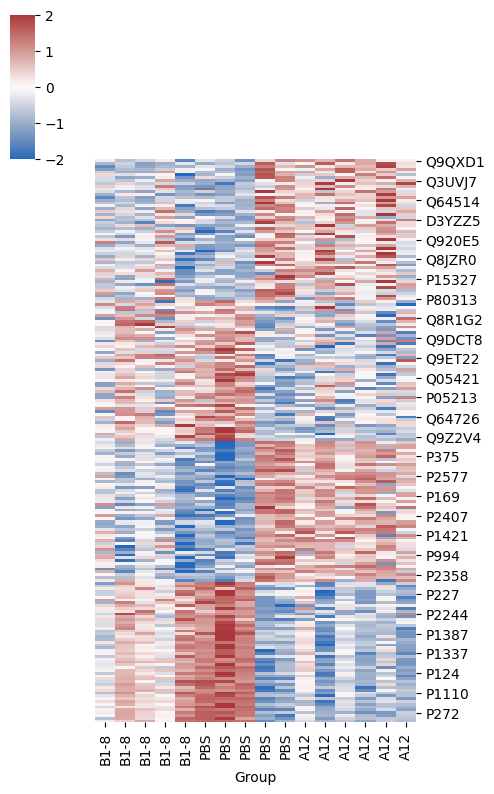

In [22]:
# HEATMAP

#prots = ['P27169','P80108','P02647','P02652']
nqup=50
nqdo=50
nmup=50
nmdo=50

tmp = xqi.loc[
    :,
    #table.index
    w_all['q'][:nqup].index.tolist()+w_all['q'][-nqdo:].index.tolist()
    #['P00738', 'P05546']
    #['B9A064','P0CG05', 'P01859', 'S6BAR0', 'S6BGF5', 'P01857', 'P01605']
    #['P05546', 'P04114']
    ].join(
    xmi.loc[
        :, 
        w_all['m'][:nmup].index.tolist()+w_all['m'][-nmdo:].index.tolist()
        #['HILP688', 'HILP675']
        # ['HILP795', 'HILP771', 'HILP793', 'HILP840', 'HILP838',
        #'HILP779', 'HILP688', 'HILP675']
        # 'HILP688', 'HILP675', 'HILP779']
        ]
    ).T

tmp.columns = mdatai.loc[tmp.columns].Group

hmap = sns.clustermap(
    tmp.loc[:, ['B1-8', 'PBS', 'A12']],
    cmap='vlag', figsize=(5,8), center=0, row_cluster=False, col_cluster=False, vmin=-2, vmax=2)

In [23]:
w_all['m']
wm

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8
P1,0.056605,-0.000056,-0.361811,1.075497,-1.220461,-0.065789,-0.026235,0.093007
P2,-0.329680,-0.018021,0.036679,0.093468,1.485607,-0.054383,-0.015895,-0.048362
P3,-0.953675,0.002824,-0.037907,-0.669032,0.082856,0.003180,0.096985,0.266394
P4,0.515383,-0.001506,-0.466358,-0.638834,-0.186088,0.088721,0.183168,0.671303
P6,-0.100608,0.000446,-0.083739,-0.474475,-0.895588,-0.123752,0.239544,0.510481
...,...,...,...,...,...,...,...,...
N1146,-0.193410,0.007551,-1.074112,0.352754,-1.250770,-0.037476,0.005730,0.104809
N1149,-0.208628,0.004601,-1.133432,0.021028,-0.298665,0.403231,-0.016902,0.302961
N1157,0.063952,-0.007565,-1.254567,0.490356,0.550966,-0.028461,-0.236779,0.610112
N1163,0.272862,0.001020,-1.097624,0.446247,-0.635587,0.028248,-0.079526,0.422578


In [24]:
# GSEA

def GSEA(basex_sort, gboolean):
    # https://www.pathwaycommons.org/guide/primers/data_analysis/gsea/#:~:text=The%20GSEA%20enrichment%20score%20(S,sets%20one%20at%20a%20time.
    gsea = pd.DataFrame({
        'group': gboolean
    })
    gsea['gint'] = gsea.group.astype(int)
    gsea['ngint'] = (~gsea.group).astype(int)
    gsea['coef'] = basex_sort.values
    gsea['coefA'] = gsea.coef.abs()
    gsea['Sg'] = gsea.coefA*gsea.gint
    gsea['Fg'] = gsea.Sg.cumsum()/gsea.Sg.sum()
    gsea['Fng'] = gsea.ngint.cumsum()/gsea.ngint.sum()
    gsea['ES'] = gsea.Fg-gsea.Fng
    
    return gsea


def plotGSEA(basex_sort, gboolean):

    gsea = GSEA(basex_sort, gboolean)
    # Calculate empirical pvalue
    rbool = np.array(gboolean.copy())

    ES_null = []
    null = 1000

    for n in range(null):
        np.random.shuffle(rbool)
        ES_null.append(GSEA(basex_sort, rbool.tolist()).ES.max())

    ES_null = np.array(ES_null)
    pvalue = (ES_null>gsea.ES.abs().max()).sum()/null
    pvalue = f"pvalue = {round(pvalue,5)}" if pvalue>0 else f"pvalue < {1/null}"
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots

    fig = make_subplots(rows=4,cols=1, row_heights=[0.5,0.1, 0.1, 0.2], vertical_spacing=0.03)

    fig.add_trace(go.Scatter(
        y=gsea.ES, showlegend=False
    ), row=1, col=1)

    [fig.add_trace(go.Scatter(
        x=[n,n], y=[0,1], line_color='black', mode='lines', line_width=0.4,showlegend=False
    ), row=2,col=1) for n,i in enumerate(gsea.gint) if i==1]

    fig.add_trace(go.Heatmap(
        z=gsea.coef,
        y=['']*gsea.shape[0],
        x=gsea.index, colorscale='RdBu_r'
    ), row=3,col=1)

    fig.add_trace(go.Scatter(
        y=gsea.coef, line_color='black', line_width=0.7, showlegend=False
    ), row=4, col=1)

    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False, row=2,col=1)
    fig.update_layout(height=700, width=1000, title=f'GSEA | ES = {np.sign(gsea.ES.max()+gsea.ES.min())*round(gsea.ES.abs().max(), 3)} | {pvalue} ')
    fig.show()

In [25]:
lfc = xmi.copy()#loc[:, basex_sort.index[gboolean]]

g2s = {i:j.index for i,j in mdatai.groupby('Group')}
lfc = lfc.loc[g2s['A12'], :].mean()-lfc.loc[g2s['B1-8'], :].mean()


L = 'TG'
n=3

basex_sort = lfc.sort_values(ascending=False)
gboolean = [L in i.split(' | ') if type(i)==str else False for i in m2i.set_index('fid').loc[basex_sort.index]['TP_Class_argmax']]

plotGSEA(basex_sort, gboolean)

In [26]:
L = 'TG'
n=3

basex_sort = wm.sort_values('Factor'+str(n+1), ascending=False)['Factor'+str(n+1)]
gboolean = [L in i.split(' | ') if type(i)==str else False for i in m2i.set_index('fid').loc[basex_sort.index]['TP_Class_argmax']]

plotGSEA(basex_sort, gboolean)

In [27]:
qset = '''
Q9QXD1
Q9D2R0
Q3UVJ7
I7DM66
Q9DCN2
Q3USD5
Q543J4
Q9QYF1
Q8VDG7
Q9EP69
Q920E5
E9Q4Z2
P55096
Q9WU19
Q8JZR0
Q920L1
Q9EPL9
Q9Z0R9
P19096
O88822
'''.strip().split('\n')

In [28]:
lfc = xqi.copy()#loc[:, basex_sort.index[gboolean]]

g2s = {i:j.index for i,j in mdatai.groupby('Group')}
lfc = lfc.loc[g2s['A12'], :].mean()-lfc.loc[g2s['B1-8'], :].mean()


basex_sort = lfc.sort_values(ascending=False)
gboolean = np.isin(basex_sort.index, qset).tolist()

plotGSEA(basex_sort, gboolean)

In [29]:
from scipy.stats import ttest_ind

t = ttest_ind(
    xmi.loc[g2s['A12']],
    xmi.loc[g2s['B1-8']]
)

t = pd.DataFrame({
    't': t.statistic,
    'p': t.pvalue,
    'fdr': multipletests(t.pvalue, method='fdr_bh')[1]
}, index=xmi.columns).join(m2i.set_index('fid'))

# m2i
# xmi

In [30]:
gbool = np.array(['TG' in i.split(' | ') if type(i)==str else False for i in t['TP_Class_argmax']])

print(f'Total TG: {gbool.sum()}')

print(f'''Total TG sig: {
np.logical_and.reduce([
    gbool, t.fdr<0.1
]).sum()
}''')

print(f'''Total TG sig: {
np.logical_and.reduce([
    gbool, t.fdr<0.1, t.t<0
]).sum()
}''')

Total TG: 278
Total TG sig: 2
Total TG sig: 2


In [31]:
# Export table with factors

q2i.set_index('fid').join(wq, how='inner').to_csv('Tables/qFactors.tsv', sep='\t')
m2i.set_index('fid').join(wm, how='inner').to_csv('Tables/mFactors.tsv', sep='\t')